Data yang digunakan adalah data kartu prakerja yang sudah dilakukan tahap 
preprocessing dan modelling, sehingga langsung melanjutkan ke tahapan algoritma svm dan nbc dengan menggunakan TF-IDF

In [1]:
#import file dari komputer
from google.colab import files
  
  
uploaded = files.upload()

Saving data-bobot.csv to data-bobot.csv


# Natural Language Processing

## Importing the libraries

In [2]:
pip install swifter

     |████████████████████████████████| 296 kB 7.7 MB/s 
     |████████████████████████████████| 132 kB 55.2 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [1]:
pip install sastrawi

     |████████████████████████████████| 209 kB 7.8 MB/s 


In [3]:
pip install googletrans

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 21.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=2d69e2fd5b0b4889b4c15b73c84da1ee6fb790653c5ebb0afdd57c8b33f67690
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [4]:
import pandas as pd
import numpy as np
import pytz
import re
import nltk
import ast
import string
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


import io
import pickle, os
import googletrans   

from datetime import datetime,timedelta
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn import naive_bayes
from sklearn.metrics import  classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from textblob import TextBlob

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Importing the dataset

In [5]:
df = pd.read_csv('data-bobot.csv')
df.shape
df.head()

,text,total,positive,negative,score,label
0,ngaruh tidak lolos kak prakerja nya,3,1,2,-1,Negatif
1,prakerja tidak lolos blt bpjs tidak gaji tidak...,8,3,5,-2,Negatif
2,nyata nyata bayar tidak kartu prakerja konon a...,4,0,4,-4,Negatif
3,hai kak kakak maksud pendafataran prakerja rek...,1,1,0,1,Positif
4,hai kak kakak ingin buka rekening bni taplus p...,2,1,1,0,Netral


In [158]:
df.head(50)

,text,total,positive,negative,score,label
0,ngaruh tidak lolos kak prakerja nya,3,1,2,-1,Negatif
1,prakerja tidak lolos blt bpjs tidak gaji tidak...,8,3,5,-2,Negatif
2,nyata nyata bayar tidak kartu prakerja konon a...,4,0,4,-4,Negatif
3,hai kak kakak maksud pendafataran prakerja rek...,1,1,0,1,Positif
4,hai kak kakak ingin buka rekening bni taplus p...,2,1,1,0,Netral
5,hai kak nureni kena sila kakak hubung selengga...,1,1,0,1,Positif
6,habis pikir pikir prakerja sisi kapitalis sih ...,3,1,2,-1,Negatif
7,prakerja lebih kiri berik gratis rakyat,2,2,0,2,Positif
8,program prakerja lebih sosialisme kapitalisme,3,2,1,1,Positif
9,negara demokrasi bijak prakerja lebih sosialis...,5,4,1,3,Positif


In [43]:
df = df.astype({'label' : 'category'})
df = df.astype({'text' : 'string'})
df.dtypes

text          string
total          int64
positive       int64
negative       int64
score          int64
label       category
dtype: object

## Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
tv = CountVectorizer()
X_cVec = tv.fit_transform(df['text'])
print(X_cVec)

  (0, 1202)	1
  (0, 1788)	1
  (0, 1016)	1
  (0, 802)	1
  (0, 1389)	1
  (0, 1257)	1
  (1, 1788)	3
  (1, 1016)	1
  (1, 1389)	1
  (1, 235)	1
  (1, 259)	1
  (1, 545)	1
  (1, 1158)	1
  (1, 1498)	1
  (2, 1788)	2
  (2, 1389)	1
  (2, 545)	1
  (2, 1259)	2
  (2, 165)	1
  (2, 825)	1
  (2, 914)	1
  (2, 76)	1
  (2, 1195)	1
  (2, 390)	1
  (2, 308)	1
  :	:
  (937, 1737)	1
  (937, 649)	1
  (937, 1835)	1
  (938, 1389)	1
  (938, 1257)	1
  (938, 189)	1
  (938, 861)	1
  (938, 980)	2
  (938, 571)	1
  (938, 1633)	1
  (938, 602)	1
  (938, 708)	1
  (938, 6)	1
  (938, 1979)	1
  (938, 1014)	1
  (938, 780)	1
  (938, 195)	1
  (939, 1389)	1
  (939, 235)	1
  (939, 259)	1
  (939, 825)	1
  (939, 1893)	1
  (939, 1105)	1
  (939, 1339)	1
  (939, 1365)	1


In [58]:
from sklearn import svm

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.20, random_state = 42)

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['score'], test_size = 0.20, random_state = 42)

## SVM and Naive Bayes Algorithm on data model

In [139]:
print(X_train.shape)
print(X_test.shape)

(752,)
(188,)


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus= ['yakali ga kuy',
         'waduh sakit sekali',
         'diam diam mencintaiku']

vectorizer = TfidfVectorizer()
#contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.57735027, 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.57735027],
       [0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.57735027, 0.57735027, 0.        ],
       [0.89442719, 0.        , 0.        , 0.4472136 , 0.        ,
        0.        , 0.        , 0.        ]])

In [141]:
X_test = vectorizer.fit_transform(X_test)
X_train = vectorizer.transform(X_train)

print(X_train.shape)
print(X_test.shape)

(752, 724)
(188, 724)


In [142]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = svm.SVC(kernel='linear')

In [143]:
clf.fit(X_train, y_train)
predict = clf.predict(X_test)


In [91]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

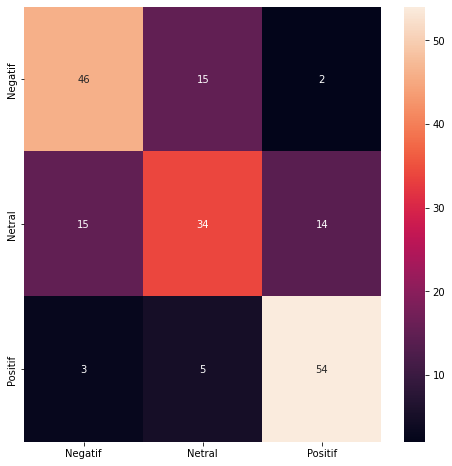

In [144]:
#grafik confusion matrix
cm = np.array(confusion_matrix(y_test, predict))

fig = plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=['Negatif','Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])

In [145]:
cm = confusion_matrix(y_test, predict)
print(cm)
accuracy_score(y_test, predict)

[[46 15  2]
 [15 34 14]
 [ 3  5 54]]


0.7127659574468085

In [146]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

     Negatif       0.72      0.73      0.72        63
      Netral       0.63      0.54      0.58        63
     Positif       0.77      0.87      0.82        62

    accuracy                           0.71       188
   macro avg       0.71      0.71      0.71       188
weighted avg       0.71      0.71      0.71       188



In [147]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)

In [148]:
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

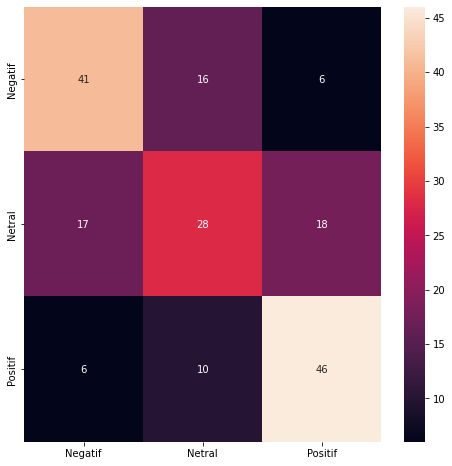

In [149]:
#grafik confusion matrix
cm = np.array(confusion_matrix(y_test, predict))

fig = plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=['Negatif','Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])

In [150]:
cm = confusion_matrix(y_test, predict)
print(cm)
accuracy_score(y_test, predict)

[[41 16  6]
 [17 28 18]
 [ 6 10 46]]


0.6117021276595744

In [151]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

     Negatif       0.64      0.65      0.65        63
      Netral       0.52      0.44      0.48        63
     Positif       0.66      0.74      0.70        62

    accuracy                           0.61       188
   macro avg       0.61      0.61      0.61       188
weighted avg       0.61      0.61      0.61       188

